# Movie Rating Prediction - Task 2

## Project Overview
This project aims to predict movie ratings based on features such as genre, director, and actors using regression techniques. The goal is to analyze historical movie data and estimate movie ratings given selected attributes.

## Objective
- Analyze movie-related features
- Perform basic preprocessing and feature encoding
- Train a regression model to predict movie ratings
- Evaluate model performance using standard metrics


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
data = pd.read_csv('D:/Users/Home/Downloads/dataset/IMDb.csv' ,encoding='latin1')
data.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


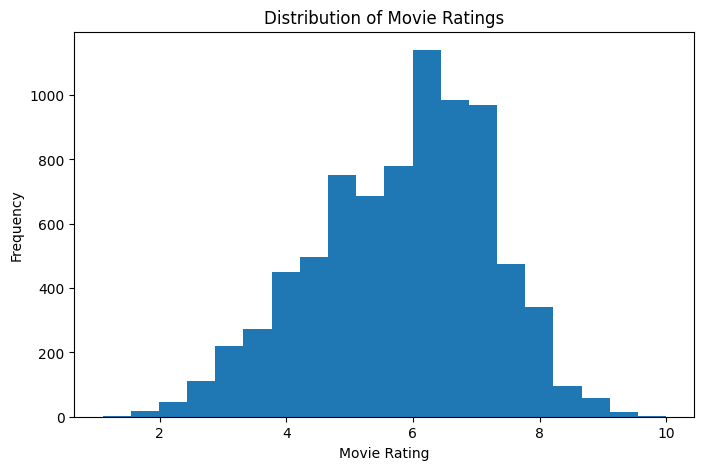

In [23]:
plt.figure(figsize=(8, 5))
plt.hist(data['Rating'], bins=20)
plt.xlabel("Movie Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Movie Ratings")
plt.show()


In [3]:
data.shape

(15509, 10)

In [4]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [5]:
data.isna().sum()
#lots of errors 

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
data = data.dropna(subset=['Rating'])
#a lot of null values are there so going to remove null vlaues only from rating because 
#i dont want any problem during testing and traning the model

In [7]:
data.isna().sum()
data.shape

(7919, 10)

In [8]:
print(data['Year'].head(10))
print(data['Year'].dtype)
# data type for the year should be int or float but its object so need to change that


1     (2019)
3     (2019)
5     (1997)
6     (2005)
8     (2012)
9     (2014)
10    (2004)
11    (2016)
12    (1991)
13    (2012)
Name: Year, dtype: object
object


In [9]:
data['Year'] = data['Year'].astype(str)
data['Year'] = data['Year'].str.extract(r'(\b19\d{2}\b|\b20\d{2}\b)')
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Year'] = data['Year'].fillna(data['Year'].median())

#in this we first convert the year into string then
# extracting the years and cleaning it and also filling any null values uding median

In [10]:
print(data['Year'].head(10))
print(data['Year'].dtype)
print(data['Year'].isna().sum())

# so it look like these clean

1     2019
3     2019
5     1997
6     2005
8     2012
9     2014
10    2004
11    2016
12    1991
13    2012
Name: Year, dtype: int64
int64
0


In [11]:
data.isna().sum()
#neeed to clean other columns

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [12]:
data = data.drop(['Actor 2','Actor 3'], axis = 1)
data
#no use of actor 2 and actor 3 so removing it

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol
6,...Yahaan,2005,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill
8,?: A Question Mark,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave
...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,1992,NaN,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra
15503,Zulm Ki Zanjeer,1989,125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi
15504,Zulm Ko Jala Doonga,1988,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah
15505,Zulmi,1999,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar


In [13]:
data['Duration'] = data['Duration'].str.replace(' min', '', regex=False)
data['Duration'] = pd.to_numeric(data['Duration'], errors='coerce')
data['Votes'] = pd.to_numeric(data['Votes'], errors = 'coerce')
data['Year'] = pd.to_numeric(data['Year'], errors = 'coerce')



In [14]:
data['Duration'] = data['Duration'].fillna(data['Duration'].median())
data['Votes'] = data['Votes'].fillna(data['Votes'].median())
data['Year'] = data['Year'].fillna(data['Year'].median())
# for the Duration columns there are "min" inside so it cannot perform median on it 
#i removed the min part from it


In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


data['Genre'] = le.fit_transform(data['Genre'])
data['Director'] = le.fit_transform(data['Director'])
data['Actor 1'] = le.fit_transform(data['Actor 1'])


# also director and actor 1 transforming but not going to use it

In [16]:
data.isna().sum()
#no null values now

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
dtype: int64

In [17]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1'],
      dtype='object')

In [18]:
X = data[['Year', 'Duration', 'Votes', 'Genre']]
y = data['Rating']



## Train-Test Split
The dataset is split into training and testing sets to evaluate the model's ability to generalize to unseen data.


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train , y_test = train_test_split(
    X,y,test_size = 0.2
)


In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

### Feature Impact Note
#Removing individual categorical features did not significantly improve model performance, indicating that movie ratings 
#are influenced by multiple complex factors rather than a single dominant feature.

MAE: 1.0556648429030184
RMSE: 1.3354341566973575
R2: 0.04315524746121924


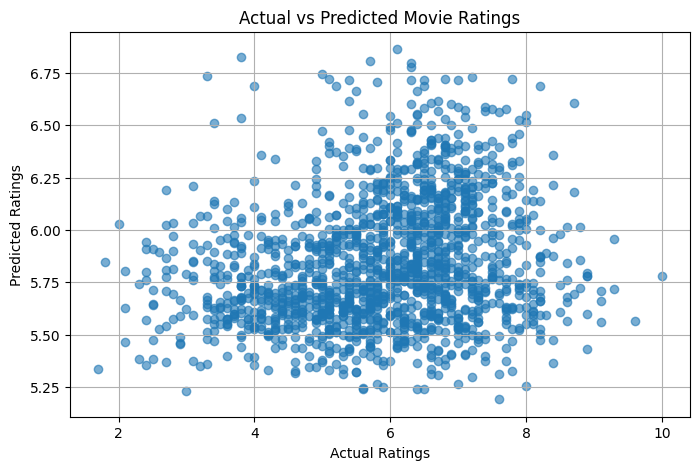

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Movie Ratings")
plt.grid(True)
plt.show()


## Conclusion
The project demonstrates how regression techniques can be used to predict movie ratings based on selected features. While the model provides reasonable predictions, further improvements such as advanced encoding techniques and additional features could enhance accuracy.
